# [CIS442D Advanced Business Analysis]
## Basemap Example 3 _ Plot earthquake data at Haiti in 2010

In this example, we will use the earthquake data at Haiti in 2010.

To get used to typical usage of this tool, using above data, we will plot the phone records to report a specific incident at nearby Port-Au-Prince when the earthquake had been occured.

- Source for the example : ⟪ McKinney, Wes. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.", 2012.⟫



- Link for the dataset : https://github.com/wesm/pydata-book/tree/master/ch08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
data = pd.read_csv('Haiti.csv')

In [3]:
# Cleaning the bad locations and removing the missing categories.
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) 
            & data.CATEGORY.notnull()]

In [6]:
# Filter out the data whose date was after the earthquake.
data = data[data['INCIDENT DATE'] >= '01/01/2010 00:00'] 
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [8]:
# Split the multiple values in 'Category'
def to_cat_list(catstr) :
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

# Make a set to get rid of the duplicates
def get_all_categories(cat_series) :
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

all_cats = get_all_categories(data.CATEGORY)

# For category, save only the english name (this has both french and english name)
def get_english(cat) :
    code, names = cat.split('.')
    if '|' in names :
        names = names.split(' | ')[1]
    return code, names.strip()

english_mapping = dict(get_english(x) for x in all_cats)

# Save splited categories as code
def get_code(seq) :
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))

In [9]:
# Make dummy data frame to indicate the categorical variables [1 = O, 2 = X]
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))), index = data.index, columns = code_index)

for row, cat in zip(data.index, data.CATEGORY) :
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

In [10]:
# Join the code information with original dataframe
data = data.join(dummy_frame.add_prefix('category_'))
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create the function to plot the map of Haiti
def basic_haiti_map(lllat = 17.25, urlat = 20.25, lllon = -75, urlon = -71) :
    m = Basemap(projection = 'stere',
               lon_0 = (urlon + lllon) / 2,
               lat_0 = (urlat + lllat) / 2,
               llcrnrlat = lllat,
               urcrnrlat = urlat,
               llcrnrlon = lllon,
               urcrnrlon = urlon,
               resolution = 'f')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

/Users/Woojin/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Woojin/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


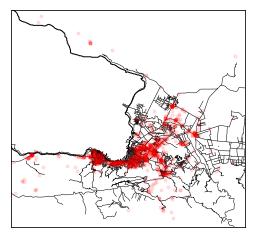

In [11]:
# After the earthquake has occurred, the point where the phone call with Category code 2a located is plotted on Haiti map
lllat = 18.42
urlat = 18.79
lllon = -72.56
urlon = -72.14
m = basic_haiti_map(lllat = lllat, urlat = urlat, lllon = lllon, urlon = urlon)
cat_data = data.ix[data['category_2a'] == 1]
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

# Plot the roads' information
shapefile_path = r'/Users/Woojin/Desktop/Rochester/Python/Tool project/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')
m.plot(x, y, 'r.', alpha = 0.1)

# Remark: ax.ishold function issue below is now being handled in basemap master.